In [1]:
import numpy as np 
## for data
import pandas as pd
import collections
import json
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
## for text processing
import re
import nltk
 
## for sentiment
from textblob import TextBlob
## for ner
import spacy
## for vectorizer
from sklearn import feature_extraction, manifold

In [2]:
## for data
import json
import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for processing
import re
import nltk
## for bag-of-words
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing
## for explainer
from lime import lime_text
## for word embedding
import gensim
import gensim.downloader as gensim_api
## for deep learning
from tensorflow.keras import models, layers, preprocessing as kprocessing
from tensorflow.keras import backend as K
## for bert language model
import transformers

In [91]:
dtf = pd.read_csv('/Users/sachin.kumar/Desktop/bayer/bayer_reviews_sentiment.csv', encoding = "ISO-8859-1")

In [92]:
dtf.head()

,Reviews,Product,sentiments
0,"Maxforce forte, I received this product today ...",Maxforce,Negative
1,These fertilizer/insect control spikes have ma...,Maxforce,Positive/Neutral
2,Application of this product is a joke!,Insect control plus fertilizer,Negative
3,"Bayer Insect control plus fertilizer, These fe...",Insect control plus fertilizer,Positive/Neutral
4,live in Florida and my porch plants were all i...,Insect control plus fertilizer,Positive/Neutral


In [83]:
dtf.head()

,Reviews,Product,sentiments
0,"Maxforce forte, I received this product today ...",Maxforce,0
1,These fertilizer/insect control spikes have ma...,Maxforce,1
2,Application of this product is a joke!,Insect control plus fertilizer,0
3,"Bayer Insect control plus fertilizer, These fe...",Insect control plus fertilizer,1
4,live in Florida and my porch plants were all i...,Insect control plus fertilizer,1


In [27]:
## filter categories
dtf = dtf[ dtf["Product"].isin(['Maxforce','Insect control plus fertilizer','All in one weed and feed']) ][["Product","Reviews"]]
## rename columns
dtf = dtf.rename(columns={"Product":"y", "Reviews":"text"})
## print 5 random rows
dtf.sample(5)

,y,text
12,Insect control plus fertilizer,This product works great preventing aphids in ...
8,Maxforce,I have used Maxforce before and this is not th...
6,All in one weed and feed,I put this BioAdvanced down last fall and this...
11,Insect control plus fertilizer,"Last ;year I had so many Japanize Beetles, I t..."
1,Maxforce,These fertilizer/insect control spikes have ma...


In [28]:
dtf.head()

,y,text
0,Maxforce,"Maxforce forte, I received this product today ..."
1,Maxforce,These fertilizer/insect control spikes have ma...
2,Insect control plus fertilizer,Application of this product is a joke!
3,Insect control plus fertilizer,"Bayer Insect control plus fertilizer, These fe..."
4,Insect control plus fertilizer,live in Florida and my porch plants were all i...


In [29]:
print(dtf.shape)
dtf.columns.values

(13, 2)


array(['y', 'text'], dtype=object)

In [30]:
dtf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 0 to 12
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   y       13 non-null     object
 1   text    13 non-null     object
dtypes: object(2)
memory usage: 312.0+ bytes


In [31]:
dtf.y.unique() 

array(['Maxforce', 'Insect control plus fertilizer',
       'All in one weed and feed'], dtype=object)

<AxesSubplot:xlabel='sentiments', ylabel='count'>

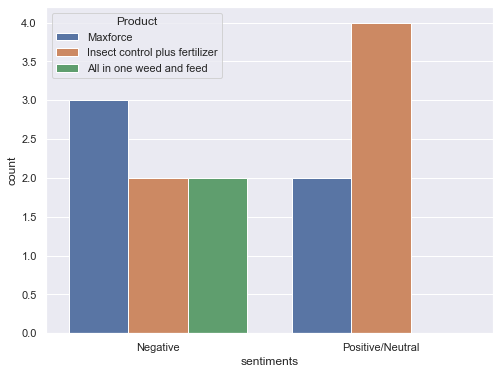

In [94]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(8,6))
sns.countplot(x='sentiments',hue = 'Product', data=dtf)


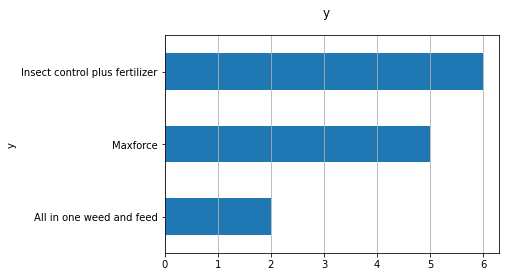

<Figure size 864x432 with 0 Axes>

In [33]:
fig, ax = plt.subplots()
fig.suptitle("y", fontsize=12)
dtf["y"].reset_index().groupby("y").count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax).grid(axis='x')
plt.figure(figsize=(12,6))
plt.show()

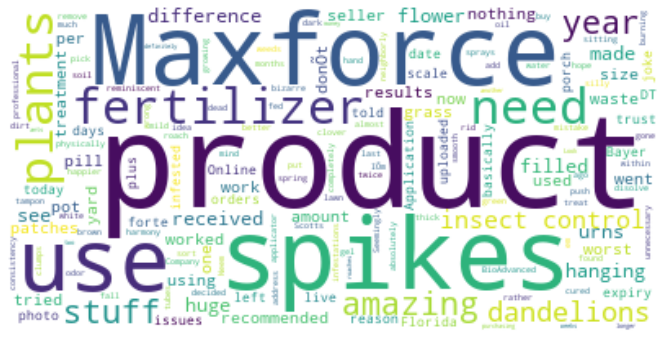

In [35]:
s = pd.Series(dtf.text[0:10], dtype="string")
# Concatenating a single Series into a string
t=s.str.cat(sep=',')  
 
from wordcloud import WordCloud, STOPWORDS
# Create and generate a word cloud image 
my_cloud =  WordCloud(background_color='white', stopwords=STOPWORDS).generate(t)
plt.figure(figsize=(12,6))
# Display the generated wordcloud image
plt.imshow(my_cloud, interpolation='bilinear') 
plt.axis("off")
# Don't forget to show the final image
plt.show()

## NER

In [37]:

import spacy
## call model
ner = spacy.load("en_core_web_lg")
## tag text
txt = dtf["text"].iloc[1]
doc = ner(txt)
spacy.displacy.render(doc, style="ent")

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/spacy/displacy/__init__.py:191: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


In [39]:
## tag text and exctract tags into a list
dtf["tags"] = dtf["text"].apply(lambda x: [(tag.text, tag.label_) 
                                for tag in ner(x).ents] )

In [40]:
dtf["tags"]

0     [(Maxforce, ORG), (today, DATE), (26-07-2020, ...
1                                                    []
2                                                    []
3                                 [(Bayer Insect, ORG)]
4     [(Florida, GPE), (almost a year, DATE), (Neem,...
5                                                    []
6     [(last fall, DATE), (this spring, DATE), (Scot...
7          [(this year, DATE), (a few years ago, DATE)]
8     [(Maxforce, ORG), (Maxforce, ORG), (Maxforce, ...
9                                   [(two weeks, DATE)]
10                 [(4 years ago, DATE), (Amazon, ORG)]
11    [(Japanize Beetles, ORG), (the spring, DATE), ...
12    [(years, DATE), (Lowe, ORG), (nearly $15, MONEY)]
Name: tags, dtype: object

In [41]:
import collections
## utils function to count the element of a list
def utils_lst_count(lst):
    dic_counter = collections.Counter()
    for x in lst:
        dic_counter[x] += 1
    dic_counter = collections.OrderedDict( 
                     sorted(dic_counter.items(), 
                     key=lambda x: x[1], reverse=True))
    lst_count = [ {key:value} for key,value in dic_counter.items() ]
    return lst_count

## count tags
dtf["tags"] = dtf["tags"].apply(lambda x: utils_lst_count(x))

## utils function create new column for each tag category
def utils_ner_features(lst_dics_tuples, tag):
    if len(lst_dics_tuples) > 0:
        tag_type = []
        for dic_tuples in lst_dics_tuples:
            for tuple in dic_tuples:
                type, n = tuple[1], dic_tuples[tuple]
                tag_type = tag_type + [type]*n
                dic_counter = collections.Counter()
                for x in tag_type:
                    dic_counter[x] += 1
        return dic_counter[tag]
    else:
        return 0

## extract features
tags_set = []
for lst in dtf["tags"].tolist():
     for dic in lst:
        for k in dic.keys():
            tags_set.append(k[1])
tags_set = list(set(tags_set))
for feature in tags_set:
     dtf["tags_"+feature] = dtf["tags"].apply(lambda x: 
                             utils_ner_features(x, feature))


dtf.head()

,y,text,tags,tags_ORG,tags_DATE,tags_FAC,tags_PERSON,tags_GPE,tags_TIME,tags_MONEY,tags_CARDINAL
0,Maxforce,"Maxforce forte, I received this product today ...","[{('Maxforce', 'ORG'): 1}, {('today', 'DATE'):...",1,2,0,0,0,1,0,0
1,Maxforce,These fertilizer/insect control spikes have ma...,[],0,0,0,0,0,0,0,0
2,Insect control plus fertilizer,Application of this product is a joke!,[],0,0,0,0,0,0,0,0
3,Insect control plus fertilizer,"Bayer Insect control plus fertilizer, These fe...","[{('Bayer Insect', 'ORG'): 1}]",1,0,0,0,0,0,0,0
4,Insect control plus fertilizer,live in Florida and my porch plants were all i...,"[{('Florida', 'GPE'): 1}, {('almost a year', '...",0,2,0,1,1,0,0,0


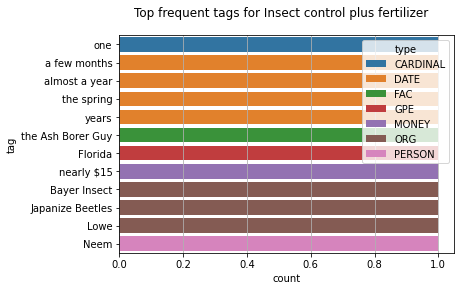

In [78]:
y = "Insect control plus fertilizer"
tags_list = dtf[dtf["y"]==y]["tags"].sum()
map_lst = list(map(lambda x: list(x.keys())[0], tags_list))
dtf_tags = pd.DataFrame(map_lst, columns=['tag','type'])
dtf_tags["count"] = 1
dtf_tags = dtf_tags.groupby(['type',  
                'tag']).count().reset_index().sort_values("count", 
                 ascending=False)
fig, ax = plt.subplots()
fig.suptitle("Top frequent tags for Insect control plus fertilizer", fontsize=12)
sns.barplot(x="count", y="tag", hue="type", 
            data=dtf_tags.iloc[:20,:], dodge=False, ax=ax)
ax.grid(axis="x")
plt.show()

In [32]:
#dtf_tags.head()
dtf_tags.to_csv('/Users/sachin.kumar/Desktop/hackathon_files/politics_tag_type_complete.csv', index=False)

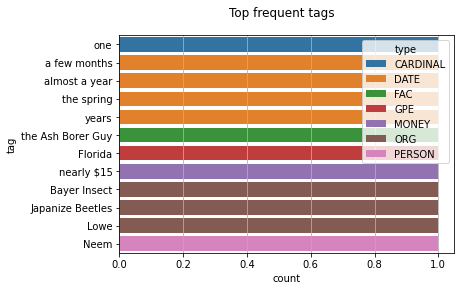

In [43]:
y = "Insect control plus fertilizer"
tags_list = dtf[dtf["y"]==y]["tags"].sum()
map_lst = list(map(lambda x: list(x.keys())[0], tags_list))
dtf_tags = pd.DataFrame(map_lst, columns=['tag','type'])
dtf_tags["count"] = 1
dtf_tags = dtf_tags.groupby(['type',  
                'tag']).count().reset_index().sort_values("count", 
                 ascending=False)
fig, ax = plt.subplots()
fig.suptitle("Top frequent tags", fontsize=12)
sns.barplot(x="count", y="tag", hue="type", 
            data=dtf_tags.iloc[:20,:], dodge=False, ax=ax)
ax.grid(axis="x")
plt.show()

# Word Frequency and Text Preprocessing

In [44]:
'''
Preprocess a string.
:parameter
    :param text: string - name of column containing text
    :param lst_stopwords: list - list of stopwords to remove
    :param flg_stemm: bool - whether stemming is to be applied
    :param flg_lemm: bool - whether lemmitisation is to be applied
:return
    cleaned text
'''
def utils_preprocess_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None):
    ## clean (convert to lowercase and remove punctuations and characters and then strip)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
            
    ## Tokenize (convert from string to list)
    lst_text = text.split()
    ## remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in 
                    lst_stopwords]
                
    ## Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]
                
    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]
            
    ## back to string from list
    text = " ".join(lst_text)
    return text

In [45]:
lst_stopwords = nltk.corpus.stopwords.words("english")

In [46]:
txt = dtf["text"].iloc[0]

In [47]:
print("--- original ---")
print(txt)
print("--- cleaning ---")
txt = re.sub(r'[^\w\s]', '', str(txt).lower().strip())
print(txt)
print("--- tokenization ---")
txt = txt.split()
print(txt)

--- original ---
Maxforce forte, I received this product today DT.17-07-2020. & product expiry date is 26-07-2020. as you can see in photo I have uploaded, I have only 9 days left to use this product.This is the reason I have trust issues for Online orders.
--- cleaning ---
maxforce forte i received this product today dt17072020  product expiry date is 26072020 as you can see in photo i have uploaded i have only 9 days left to use this productthis is the reason i have trust issues for online orders
--- tokenization ---
['maxforce', 'forte', 'i', 'received', 'this', 'product', 'today', 'dt17072020', 'product', 'expiry', 'date', 'is', '26072020', 'as', 'you', 'can', 'see', 'in', 'photo', 'i', 'have', 'uploaded', 'i', 'have', 'only', '9', 'days', 'left', 'to', 'use', 'this', 'productthis', 'is', 'the', 'reason', 'i', 'have', 'trust', 'issues', 'for', 'online', 'orders']


In [48]:
print("--- stemming ---")
ps = nltk.stem.porter.PorterStemmer()
print([ps.stem(word) for word in txt])
print("--- lemmatisation ---")
lem = nltk.stem.wordnet.WordNetLemmatizer()
print([lem.lemmatize(word) for word in txt])

--- stemming ---
['maxforc', 'fort', 'i', 'receiv', 'thi', 'product', 'today', 'dt17072020', 'product', 'expiri', 'date', 'is', '26072020', 'as', 'you', 'can', 'see', 'in', 'photo', 'i', 'have', 'upload', 'i', 'have', 'onli', '9', 'day', 'left', 'to', 'use', 'thi', 'productthi', 'is', 'the', 'reason', 'i', 'have', 'trust', 'issu', 'for', 'onlin', 'order']
--- lemmatisation ---
['maxforce', 'forte', 'i', 'received', 'this', 'product', 'today', 'dt17072020', 'product', 'expiry', 'date', 'is', '26072020', 'a', 'you', 'can', 'see', 'in', 'photo', 'i', 'have', 'uploaded', 'i', 'have', 'only', '9', 'day', 'left', 'to', 'use', 'this', 'productthis', 'is', 'the', 'reason', 'i', 'have', 'trust', 'issue', 'for', 'online', 'order']


In [49]:
dtf["text_clean"] = dtf["text"].apply(lambda x: utils_preprocess_text(x, flg_stemm=False, flg_lemm=True, lst_stopwords=lst_stopwords))

In [50]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sachin.kumar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

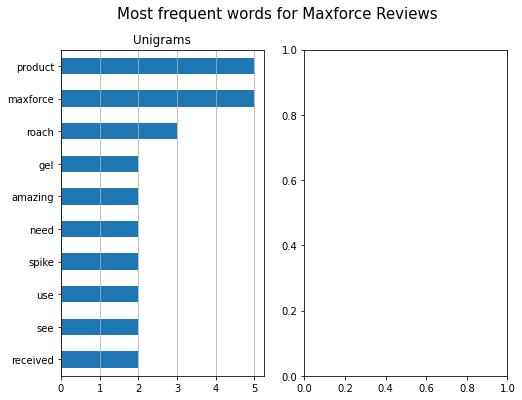

In [69]:

y = "Maxforce"
corpus = dtf[dtf["y"]==y]["text_clean"]
lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.suptitle("Most frequent words for Maxforce Reviews", fontsize=15)
    
## unigrams
dic_words_freq = nltk.FreqDist(lst_tokens)
dtf_uni = pd.DataFrame(dic_words_freq.most_common(), 
                       columns=["Word","Freq"])
dtf_uni.set_index("Word").iloc[:10,:].sort_values(by="Freq").plot(
                  kind="barh", title="Unigrams", ax=ax[0], 
                  legend=False,figsize=(8,6)).grid(axis='x')
ax[0].set(ylabel=None)
    
## bigrams
#dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, 2))
#dtf_bi = pd.DataFrame(dic_words_freq.most_common(), 
#                      columns=["Word","Freq"])
#dtf_bi["Word"] = dtf_bi["Word"].apply(lambda x: " ".join(
#                   string for string in x) )
#dtf_bi.set_index("Word").iloc[:20,:].sort_values(by="Freq").plot(
#                  kind="barh", title="Bigrams", ax=ax[1],
#                  legend=False).grid(axis='x')
#ax[1].set(ylabel=None)
plt.show()

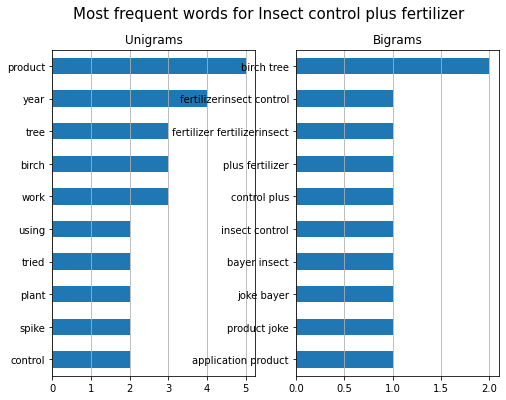

In [79]:
y = "Insect control plus fertilizer"
corpus = dtf[dtf["y"]==y]["text_clean"]
lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.suptitle("Most frequent words for Insect control plus fertilizer", fontsize=15)
    
## unigrams
dic_words_freq = nltk.FreqDist(lst_tokens)
dtf_uni = pd.DataFrame(dic_words_freq.most_common(), 
                       columns=["Word","Freq"])
dtf_uni.set_index("Word").iloc[:10,:].sort_values(by="Freq").plot(
                  kind="barh", title="Unigrams", ax=ax[0], 
                  legend=False,figsize=(8,6)).grid(axis='x')
ax[0].set(ylabel=None)
    
## bigrams
dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, 2))
dtf_bi = pd.DataFrame(dic_words_freq.most_common(), 
                      columns=["Word","Freq"])
dtf_bi["Word"] = dtf_bi["Word"].apply(lambda x: " ".join(
                   string for string in x) )
dtf_bi.set_index("Word").iloc[:10,:].sort_values(by="Freq").plot(
                  kind="barh", title="Bigrams", ax=ax[1],
                  legend=False,figsize=(8,6)).grid(axis='x')
ax[1].set(ylabel=None)
plt.show()